## ```Races``` Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

The dataset is used after it has undergone the phases of cleaning, feature engineering, and outlier detection.

In [ ]:
races_df = pd.read_csv('../dataset/races_outlier.csv')

### **Clustering Preprocessing - Normalization**

#### **Decision of rcaes features**
Feature decision is made among the numerical-only features 

In [ ]:
# columns_preserve = ['startlist_quality', 'avg_cyclists_level', 'race_importance']     SIMONELLI
columns_preserve = ["avg_cyclists_level", "race_importance"] #["climb_total", "length"]
all_races_df = races_df
# Create a new dataset with only the specified columns
races_df = races_df[columns_preserve]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(races_df)
races_normalized_df = scaler.transform(races_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(races_df)), columns=races_df.columns)



,avg_cyclists_level,race_importance
0,-0.036133,0.498403
1,0.133930,0.311195
2,0.101016,0.387745
3,0.263208,0.419218
4,0.206134,0.371614
...,...,...
2520,0.070864,0.167946
2521,0.083588,0.165084
2522,0.071326,0.159360
2523,0.090377,0.154590


### **K-means** for reaces dataset

### **Best K**

In [ ]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(races_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 67.79167412637909
k: 3, SSE: 38.416371495939494
k: 4, SSE: 25.43422225808525
k: 5, SSE: 20.983996577366703
k: 6, SSE: 17.803170756603954
k: 7, SSE: 15.342864688180226
k: 8, SSE: 13.800677856341329
k: 9, SSE: 12.287301033975467
k: 10, SSE: 10.844492799805321
k: 15, SSE: 7.4175455565181
k: 20, SSE: 5.508915071651053


In [ ]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 67.79167412637909
Separation 0.7579472161395392
Silhouette 0.5245073456670373
for k = 3
SSE 38.416371495939494
Separation 0.6811064448815635
Silhouette 0.5336493742614987
for k = 4
SSE 25.43422225808525
Separation 0.691760880292407
Silhouette 0.48754817839492903
for k = 5
SSE 20.983996577366703
Separation 0.7847670444935171
Silhouette 0.4599480301674148
for k = 6
SSE 17.803170756603954
Separation 0.8106756432663963
Silhouette 0.41624248946583436
for k = 7
SSE 15.342864688180226
Separation 0.883888943988703
Silhouette 0.38606562373290926
for k = 8
SSE 13.800677856341329
Separation 0.8761206159022394
Silhouette 0.3864094985166481
for k = 9
SSE 12.287301033975467
Separation 0.9135431774565131
Silhouette 0.3508581485472611
for k = 10
SSE 10.844492799805321
Separation 0.8567124428431867
Silhouette 0.3582918862123758
for k = 15
SSE 7.4175455565181
Separation 0.8123857095069488
Silhouette 0.36510987722046556
for k = 20
SSE 5.508915071651053
Separation 0.7999346394361254
Silhouet

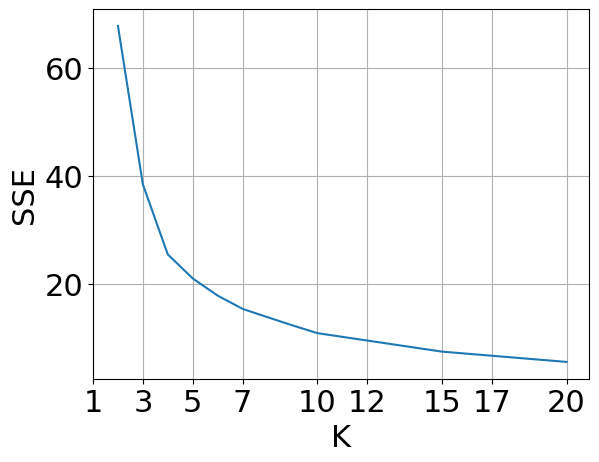

In [ ]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


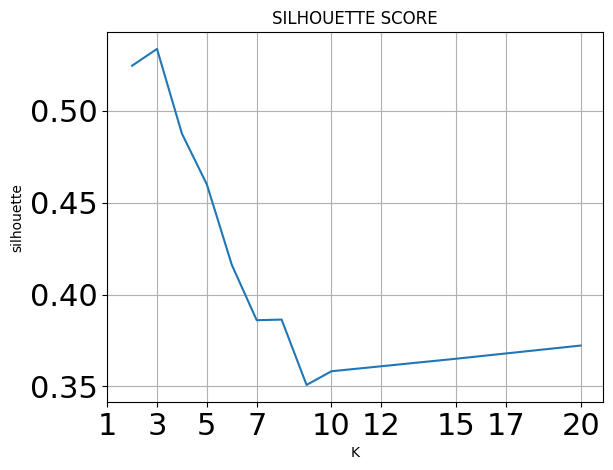

In [ ]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

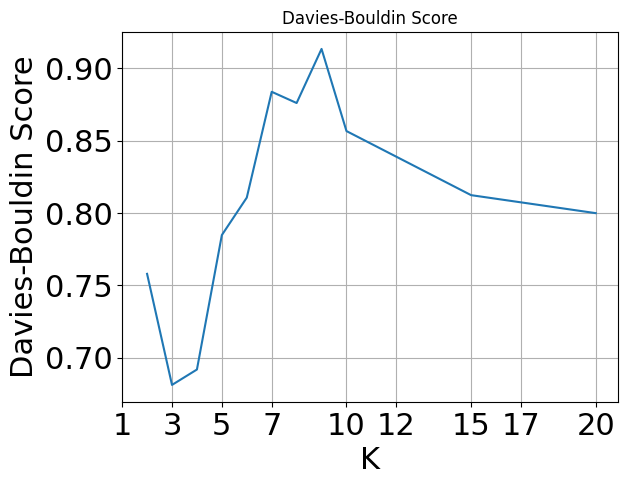

In [ ]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

### **K-means resuslts** (races datastet)

In [ ]:
#RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(races_normalized_df)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [ ]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [713, 261, 1551]


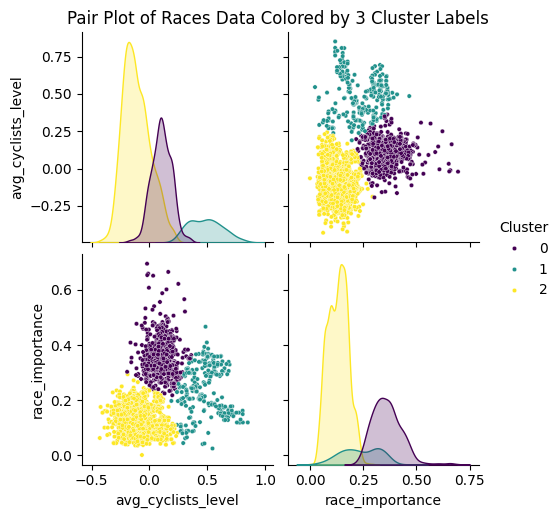

In [ ]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

all_races_df = all_races_df.assign(Cluster=labels_series.values)

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(races_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10, 'alpha': 1.0})
plt.suptitle(f'Pair Plot of Races Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()

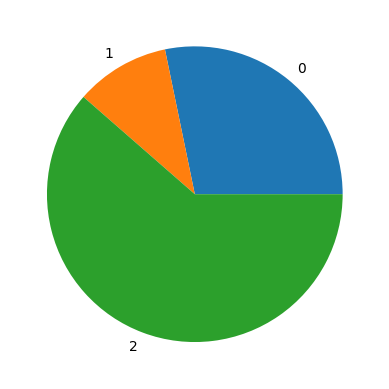

In [ ]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### Characterization based on ```top_complex_races``` column

KeyError: 'top_races_importance'

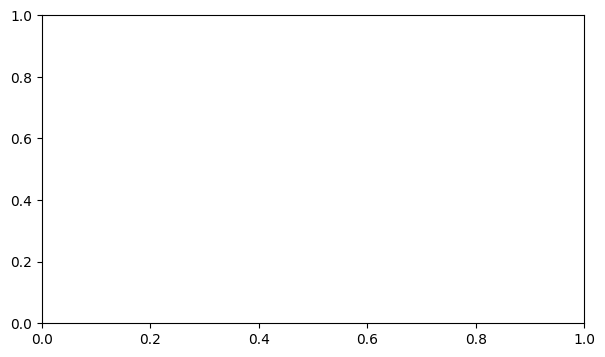

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_races_df['top_races_importance'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


**More precise visualization**

In [ ]:
# Sort the cyclists_df DataFrame by the 'career_level' column in descending order
sorted_races_df = all_races_df.sort_values(by='race_importance', ascending=False)
# [323, 1347, 856] for length and climb total

# Define the bins and labels
bins = [0, occ_list[0],  occ_list[0]+occ_list[1], len(sorted_races_df)]
labels = ['Top'+str(bins[1]), 'Top'+str(bins[2]), 'Rest']

# Create a new column 'career_level_category' based on the bins
sorted_races_df['top_races2'] = pd.cut(range(1, len(sorted_races_df) + 1), bins=bins, labels=labels, right=False)

# Add the 'top_cyclists' column to the original cyclists_df
all_races_df = all_races_df.merge(sorted_races_df[['_url', 'top_races2']], on='_url', how='left')

all_races_df

,_url,name,points,length,climb_total,profile,startlist_quality,is_tarmac,start_date,duration,...,avg_slope,min_duration,duration_to_length,real_name,startlist_entropy,points_entropy,difficulty_index_2,top_complex_races_2,Cluster,top_races2
0,amstel-gold-race/2012/result,Amstel Gold Race,225.0,2.565,3.300,2.0,1251,False,2012-04-15,06:32:35,...,128.6550,6.543056,25.5090,amstel-gold-race,3.459432,-0.000000,0.454133,Top 1300,0,Top713
1,amstel-gold-race/2013/result,Amstel Gold Race,225.0,2.518,3.500,2.0,1149,False,2013-04-14,06:35:21,...,138.9992,6.589167,26.1683,amstel-gold-race,3.459432,-0.000000,0.502886,Top 1300,0,Top713
2,amstel-gold-race/2014/result,Amstel Gold Race,225.0,2.514,3.495,2.0,1140,False,2014-04-20,06:25:57,...,139.0215,6.432500,25.5867,amstel-gold-race,3.459432,-0.000000,0.488218,Top 1300,0,Top713
3,amstel-gold-race/2015/result,Amstel Gold Race,225.0,2.580,3.558,3.0,1175,False,2015-04-19,06:31:49,...,137.9070,6.530278,25.3112,amstel-gold-race,3.459432,-0.000000,0.768701,Top 1000,0,Top713
4,amstel-gold-race/2016/result,Amstel Gold Race,225.0,2.487,3.320,2.0,1120,False,2016-04-17,06:18:03,...,133.4942,6.300833,25.3351,amstel-gold-race,3.459432,-0.000000,0.500786,Top 1300,0,Top713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,vuelta-a-espana/2022/stage-6,La Vuelta ciclista a España,80.0,1.812,4.120,5.0,968,True,2022-08-25,04:38:00,...,227.3731,4.633333,25.5703,vuelta-a-espana,4.510788,0.057459,1.249892,Top 500,2,Rest
2521,vuelta-a-espana/2022/stage-7,La Vuelta ciclista a España,80.0,1.900,3.359,2.0,968,True,2022-08-26,04:30:58,...,176.7895,4.516111,23.7690,vuelta-a-espana,4.510788,0.057459,0.456009,Top 1300,2,Rest
2522,vuelta-a-espana/2022/stage-8,La Vuelta ciclista a España,80.0,1.534,3.741,5.0,968,True,2022-08-27,04:05:25,...,243.8722,4.090278,26.6641,vuelta-a-espana,4.510788,0.057459,1.254049,Top 500,2,Rest
2523,vuelta-a-espana/2022/stage-9,La Vuelta ciclista a España,80.0,1.714,3.675,5.0,968,True,2022-08-28,04:32:39,...,214.4107,4.544167,26.5121,vuelta-a-espana,4.510788,0.057459,1.253890,Top 500,2,Rest


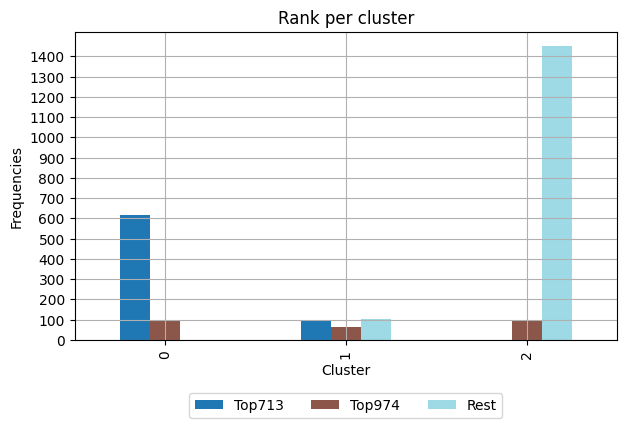

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_races_df['top_races2'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Aggiungere più intervalli sull'asse y
ax.set_yticks(range(0, rank_xt_pct.values.max() + 1, 100))

# Aggiungere la griglia
ax.grid(True)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()

## **TO DO** 

#### Radar plot

0
1
2


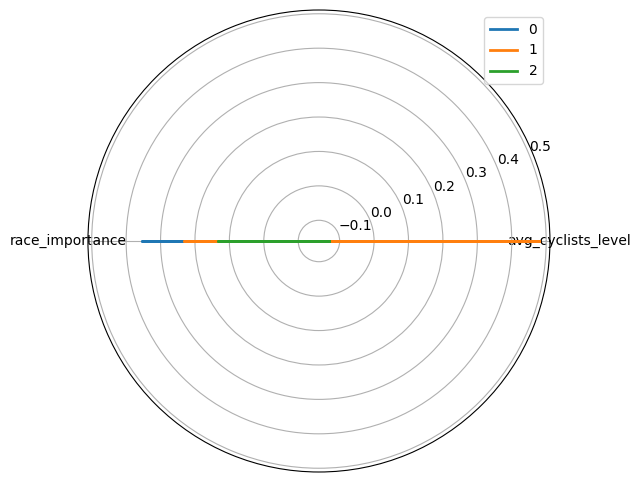

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(races_df.columns)
plt.figure(figsize=(6, 6))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    values = races_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], races_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

#### Parallel Coordinates Plot for Centroids

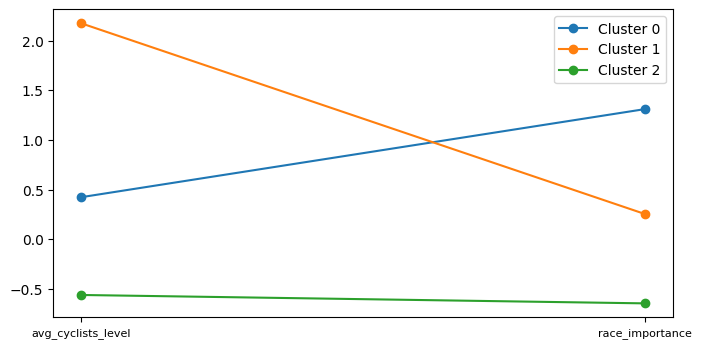

In [ ]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8, 4))
centers = best_kmeans.cluster_centers_
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(columns_preserve)), columns_preserve, fontsize=8)
plt.legend(fontsize=10)
plt.show()